In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import openweathermapy.core as owm
import json
import requests
import numpy as np
from config import wapi_key
from citipy import citipy
from pprint import pprint
from mpl_toolkits.basemap import Basemap, cm

# Latitude : max/min +90 to -90
# Longitude : max/min +180 to -180

In [2]:
# setting dictionary
settings = {"units": "metric", "appid": wapi_key}

In [3]:
# generate city object with citipy
rand_lat = round(np.random.uniform(-90, 90), 2)
rand_long = round(np.random.uniform(-180, 180), 2)
city = citipy.nearest_city(rand_lat, rand_long)

In [4]:
# use wrapper to get data
location = (f"{city.city_name},{city.country_code}")
data = owm.get_current(location, **settings)
print(f"City: {city.city_name}, {city.country_code}, Lat: {data('coord.lat')}, Long: {data('coord.lon')}")

City: jingdezhen, cn, Lat: 29.29, Long: 117.2


In [15]:
city.city_name.title(), city.country_code.upper()

('Jingdezhen', 'CN')

In [5]:
pprint(data)

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 29.29, 'lon': 117.2},
 'dt': 1523368700,
 'id': 1805680,
 'main': {'grnd_level': 1012.87,
          'humidity': 75,
          'pressure': 1012.87,
          'sea_level': 1024.79,
          'temp': 19.67,
          'temp_max': 19.67,
          'temp_min': 19.67},
 'name': 'Jingdezhen',
 'sys': {'country': 'CN',
         'message': 0.0035,
         'sunrise': 1523310628,
         'sunset': 1523356490},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 165.502, 'speed': 2.52}}


In [6]:
# need to seed the dataframe for the first if statement in the loop
city_list = []
country_list = []
lat_list = []
long_list = []
temp_list = []
humid_list = []
cloudiness_list = []
windspeed_list = []

city_list.append(city.city_name)
country_list.append(city.country_code)
lat_list.append(data('coord.lat'))
long_list.append(data('coord.lon'))
temp_list.append(data('main.temp'))
humid_list.append(data('main.humidity'))
cloudiness_list.append(data('clouds.all'))
windspeed_list.append(data('wind.speed'))


In [7]:
city_df = pd.DataFrame({"City": city_list, "Country": country_list, "Latitude": lat_list, "Longitude": long_list, 
                        "Temperature": temp_list, "Humidity": humid_list, "Cloudiness": cloudiness_list, 
                        "Wind Speed": windspeed_list})
city_df

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,jingdezhen,68,cn,75,29.29,117.2,19.67,2.52


In [8]:
ctr = 1
errCtr = 0

while ctr < 100:
    
    # get the city and country
    rand_lat = round(np.random.uniform(-90, 90), 2)
    rand_long = round(np.random.uniform(-180, 180), 2)
    city_data = citipy.nearest_city(rand_lat, rand_long)
    name = city_data.city_name
    country_code = city_data.country_code
    
    print(f"Requesting current weather data for city #{ctr} {name}, {country_code}  ")
    print()

    try:
        location = (f"{city_data.city_name},{city_data.country_code}")
        data = owm.get_current(location, **settings)
    
    except KeyboardInterrupt:
        break
    
    except Exception as e:
        errCtr += 1
        print("Something is missing...")
        print(e)
        print(f"Error #{errCtr}")
        print()
    
    
    # iterate over dataframe to check for duplicate cities
    for index, row in city_df.iterrows():

        if row["City"] == name: #and row["Country"] == country_code:
            print(f"Duplicate City: {name}")
            print()
        else:
            city_list.append(name)
            country_list.append(country_code)
            lat_list.append(data('coord.lat'))
            long_list.append(data('coord.lon'))
            temp_list.append(data('main.temp'))
            humid_list.append(data('main.humidity'))
            cloudiness_list.append(data('clouds.all'))
            windspeed_list.append(data('wind.speed'))


    ctr += 1
city_df = pd.DataFrame({"City": city_list, "Country": country_list, "Latitude": lat_list, "Longitude": long_list, 
                                "Temperature": temp_list, "Humidity": humid_list, "Cloudiness": cloudiness_list, 
                                "Wind Speed": windspeed_list}) 

city_df = city_df[["City", "Country", "Latitude", "Longitude", "Temperature", "Humidity", "Cloudiness", "Wind Speed"]]

city_df.head(50) 
    

Requesting current weather data for city #1 chokurdakh, ru  

Requesting current weather data for city #2 niquero, cu  

Requesting current weather data for city #3 saldanha, za  

Requesting current weather data for city #4 tumannyy, ru  

Something is missing...
HTTP Error 404: Not Found
Error #1

Requesting current weather data for city #5 qaanaaq, gl  

Requesting current weather data for city #6 nantucket, us  

Requesting current weather data for city #7 albany, au  

Requesting current weather data for city #8 meulaboh, id  

Requesting current weather data for city #9 faanui, pf  

Requesting current weather data for city #10 rikitea, pf  

Requesting current weather data for city #11 jamestown, sh  

Requesting current weather data for city #12 hilo, us  

Requesting current weather data for city #13 bluff, nz  

Requesting current weather data for city #14 belushya guba, ru  

Something is missing...
HTTP Error 404: Not Found
Error #2

Requesting current weather data for city

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,jingdezhen,cn,29.29,117.20,19.67,75,68,2.52
1,chokurdakh,ru,70.62,147.90,-17.29,73,80,1.32
2,niquero,cu,20.04,-77.58,28.82,82,0,3.47
3,saldanha,za,-33.01,17.94,26.00,39,0,8.70
4,tumannyy,ru,-33.01,17.94,26.00,39,0,8.70
5,qaanaaq,gl,77.48,-69.36,-11.74,82,20,3.37
6,nantucket,us,41.28,-70.10,4.41,64,1,2.60
7,albany,au,-35.02,117.88,12.17,98,80,4.72
8,meulaboh,id,4.14,96.13,26.82,100,68,0.37
9,faanui,pf,-16.48,-151.75,28.12,100,88,4.67


In [9]:
pd.concat(g for _, g in city_df.groupby("City") if len(g) > 1)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
7,albany,au,-35.02,117.88,12.17,98,80,4.72
15,albany,au,-35.02,117.88,12.17,98,80,4.72
33,albany,au,-35.02,117.88,12.17,98,80,4.72
26,barentsburg,sj,-7.47,-34.81,25.32,100,88,4.32
94,barentsburg,sj,47.16,-67.94,-5.30,57,90,3.10
14,belushya guba,ru,-46.60,168.33,10.57,100,76,12.32
54,belushya guba,ru,68.22,-135.01,-13.61,71,5,3.60
37,bredasdorp,za,-34.53,20.04,22.00,53,0,8.20
75,bredasdorp,za,-34.53,20.04,22.00,53,0,8.20
12,hilo,us,19.71,-155.08,23.00,88,90,4.60


Text(0.5,1,'Temp Map')

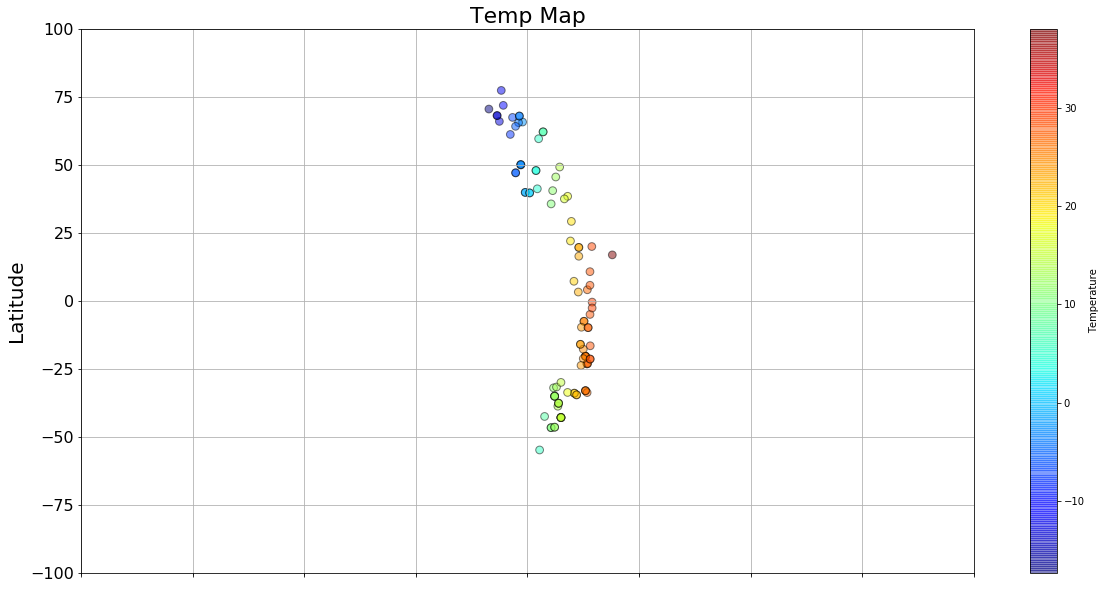

In [10]:
city_df.plot.scatter('Temperature', 'Latitude', s=60, edgecolor='black', alpha=0.50, 
                     c='Temperature', colormap = 'jet',
                     figsize=(20, 10), fontsize=16, grid=True, 
                     xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Temp Map', fontsize=22)

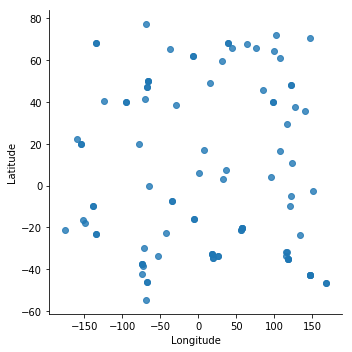

In [11]:
sns.lmplot(x='Longitude', y='Latitude', data=city_df,
          fit_reg=False)

Text(0.5,1,'Temp Map')

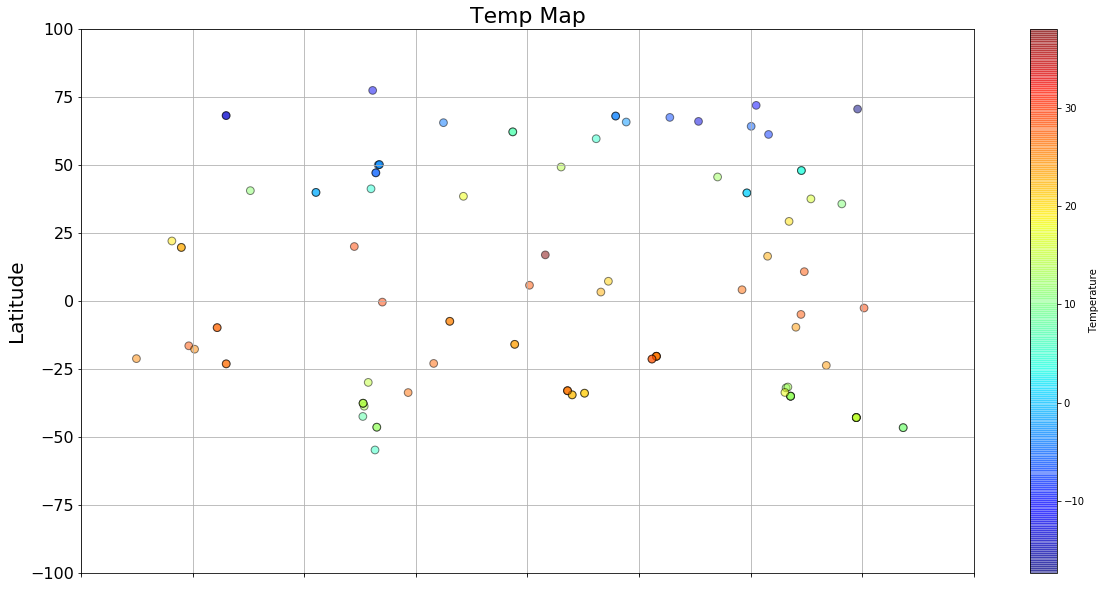

In [12]:
city_df.plot.scatter('Longitude', 'Latitude', s=60, edgecolor='black', alpha=0.50, 
                     c='Temperature', colormap = 'jet',
                     figsize=(20, 10), fontsize=16, grid=True, 
                     xlim=(-200, 200), ylim=(-100, 100))

plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.title('Temp Map', fontsize=22)

C:\Users\Mike\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Mike\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


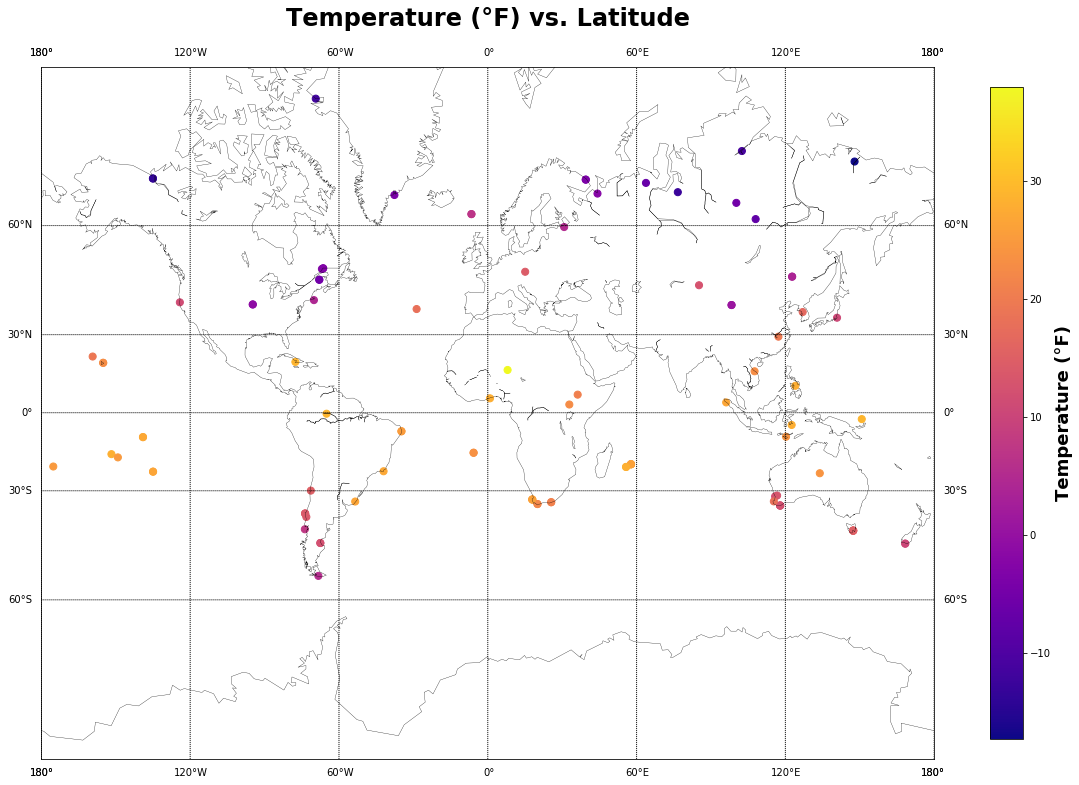

In [13]:
f, ax = plt.subplots(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.3)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,1,1])

#create coordinates
lng = city_df['Longitude'].values
lat = city_df['Latitude'].values
temps = city_df['Temperature'].values
x,y= m(lng, lat)

cax = m.scatter(x,y, latlon=False, c=temps, s=50, cmap='plasma', alpha=1)
cbar = f.colorbar(cax, shrink=0.8)
cbar.set_label('Temperature (°F)', fontsize=18, weight='bold')

plt.title('Temperature (°F) vs. Latitude', fontsize=24, position=(0.5,1.05), weight='bold')
plt.show()